Import numpy and matplotlib
set default figure size

In [154]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

Load a few sample timetraces. So far available are pixels 1, 32, 64, 65, 96, 128. This corresponds to left, middle, right of probe pixel row and reference pixel row.

In [155]:
raw1 = np.loadtxt('pixel_1.txt',dtype=float)
# raw32 = np.loadtxt('pixel_32.txt',dtype=float)
# raw65 = np.loadtxt('pixel_65.txt',dtype=float)

Plot a bit of the raw data. There is some periodic pattern, e. g. around 4000.

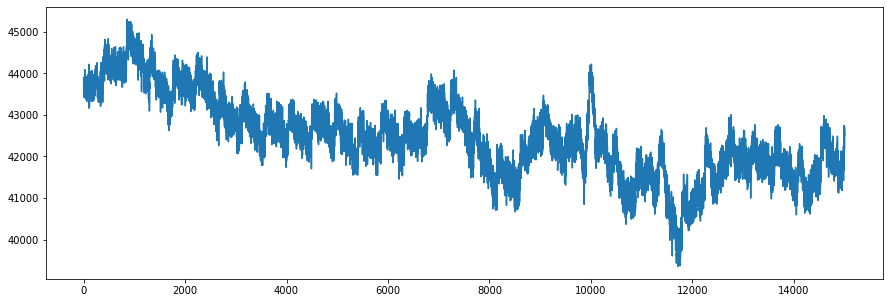

In [156]:
raw = raw1 # first probe pixel
# raw = raw65 # frist reference pixel
# raw = raw1/raw65 # corrected intensity from first probe/ref pixel pair
plt.plot(raw[:15000])

In [157]:
raw = raw-raw.mean() # just correcting for mean, as in Kearns et al.

Just for checking purposes, insert an artificial periodic $sin(x)$ signal that we would expect to find in the Fourier transform.

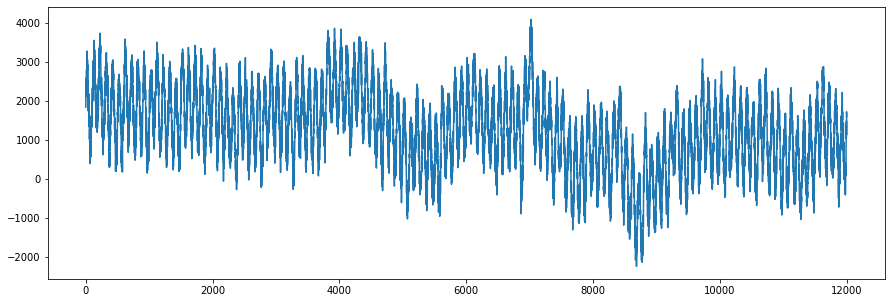

In [158]:
# insert a large spike signal
x = 2*np.pi*np.arange(300000)/100 # artificial sines with a full period of 100 shots
y = 1000*np.sin(x)
raw_spiked = raw+y
plt.plot(raw_spiked[3000:15000])
plt.show()

Now the FFT. It is symmetric and we discard the right half. Plot the complete thing and the interesting magnification up to 5000.

**x-axis is not converted to frequencies in these plots**

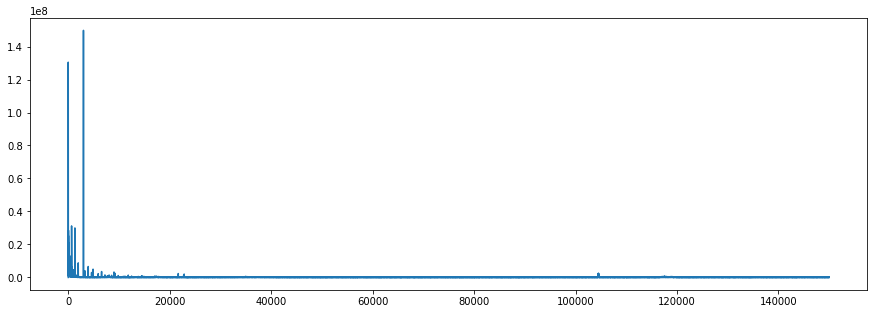

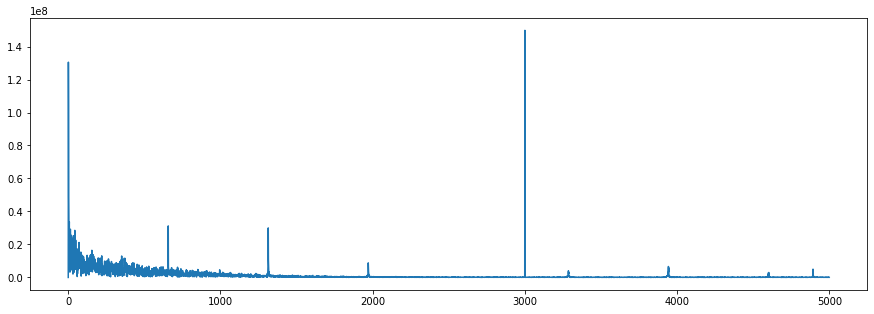

In [159]:
f = np.fft.fft(raw_spiked)
plt.plot((abs(f[:150000])))
plt.show()
plt.plot((abs(f[:5000])))
plt.show()

Print indices of the 10 highest peaks between 500 and 5000 in descending order.

The artificial spike is the largest.

Then convert these positions into periods (measured in number of shots). As expected, the spike has the original period of 100. So this analysis should be correct.

But there are a few other funny peaks in the original data, e. g. at 457 shots and 228 shots (~457/2).


In [160]:
ten_highest = (np.argsort(abs(f[500:5000]))[-10:]+500)[::-1]
print(ten_highest)
print(1/np.fft.fftfreq(300000)[ten_highest])

[3000  657 1314 1315 1971  529 1313 3943  610  515]
[100.         456.62100457 228.31050228 228.13688213 152.20700152
 567.10775047 228.4843869   76.08419985 491.80327869 582.52427184]


Now the pedestrian autocorrelation (there is a more clever way via the FFT, see below).

In [161]:
corr = np.correlate(raw,raw,'full')
middle = len(corr)//2
corrn = corr/corr[middle] # normalized to 1 at point zero (which is in the middle of the symmetric result)

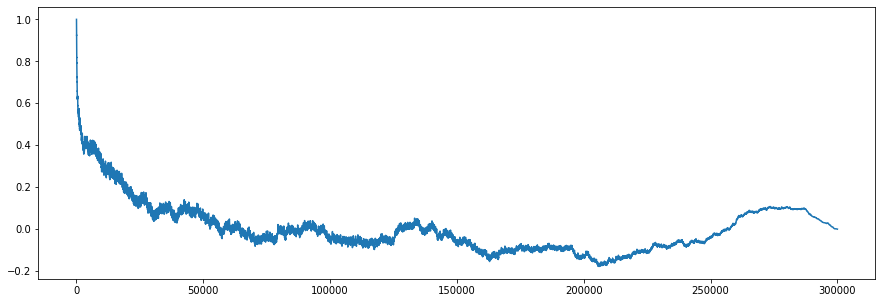

In [162]:
plt.plot(corrn[middle:])

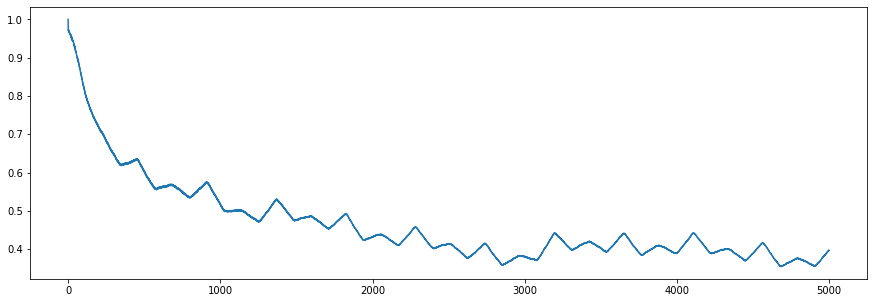

In [163]:
plt.plot(corrn[middle:middle+5000])

Autocorrelation drops to 0.5 around $\tau=1000$ shots. And these funny periodicities are visible even here.

Autocorrelation via FFT, from an internet recipe. Result is indeed the same, but much faster.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


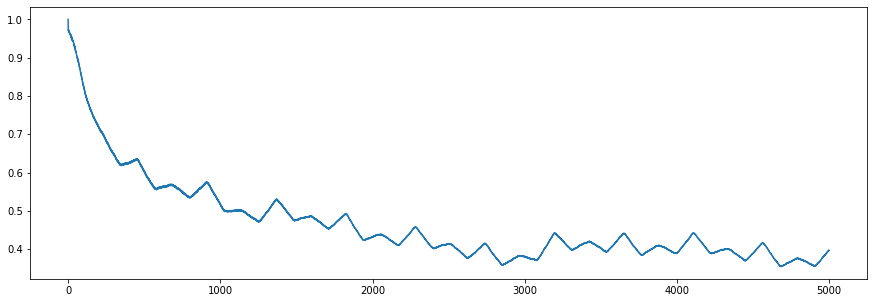

In [164]:
raw_filled = np.concatenate((raw,np.zeros(len(raw)-1)))
FT_raw_filled = np.fft.fft(raw_filled)
S = np.conj(FT_raw_filled)*FT_raw_filled
corr_fft_full = np.fft.ifft(S)
corr_fft = corr_fft_full[:(corr_fft_full.size//2)+1]
corr_fft = corr_fft/corr_fft[0]
plt.plot(corr_fft[:5000])